# UberEats配達データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [4]:
print(len(master))
# master.head(5)

411


In [5]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_address',
       'drop_latitude', 'drop_longitude', 'drop_time', 'month',
       'pickup_address', 'pickup_latitude', 'pickup_longitude', 'pickup_time',
       'price', 'url', 'year', 'cash', 'peak'],
      dtype='object')

In [6]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time', "drop_address", "drop_latitude", "drop_longitude"], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to df32113f-66ef-4ffe-9804-d84d9d244c50
Data columns (total 9 columns):
distance            411 non-null float64
drive_time          411 non-null float64
month               411 non-null int64
price               411 non-null int64
cash                238 non-null float64
peak                238 non-null float64
pickup_datetime     411 non-null datetime64[ns]
drop_datetime       411 non-null datetime64[ns]
shop_position_id    411 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 32.1+ KB


In [8]:
df['date'] = df['pickup_datetime'].dt.date
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour
df["week_of_month"] = df['pickup_datetime'].dt.week

In [9]:
# df.head(3)

## 毎日のデータ集計

In [10]:
target_day = datetime.datetime(2020, 2, 20).date()
# target_day = datetime.datetime.today().date()
df_day = df[df["date"] == target_day].sort_values('pickup_datetime')

In [11]:
df_day

,distance,drive_time,month,price,cash,peak,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,,,
61c26822-5236-4f58-9fa8-010e5e2de2d9,5.71,33.5,2,640,2046.0,0.0,2020-02-20 11:14:00,2020-02-20 11:54:00,35.60306167602539-139.61627197265622,2020-02-20,3,Thursday,20,11,8
f557ac9e-2dc8-495e-94f6-a0198eb2023f,1.69,10.6,2,424,0.0,0.0,2020-02-20 12:19:00,2020-02-20 12:32:00,35.58701705932617-139.62977600097656,2020-02-20,3,Thursday,20,12,8
df32113f-66ef-4ffe-9804-d84d9d244c50,1.98,13.2,2,439,1140.0,0.0,2020-02-20 12:41:00,2020-02-20 13:01:00,35.58764266967773-139.63066101074222,2020-02-20,3,Thursday,20,12,8
9357bc90-ec0f-458c-80f5-44ac00a94271,1.80,17.3,2,430,0.0,0.0,2020-02-20 13:12:00,2020-02-20 13:30:00,35.603126525878906-139.61636352539062,2020-02-20,3,Thursday,20,13,8
7730fbcb-7fe6-4dfb-b062-6a4795c3b2ad,1.56,12.7,2,417,0.0,0.0,2020-02-20 18:13:00,2020-02-20 18:28:00,35.60309219360352-139.61631774902344,2020-02-20,3,Thursday,20,18,8
2efad1e8-5692-45c4-b966-456f21c56fe5,1.50,11.6,2,413,1018.0,0.0,2020-02-20 18:31:00,2020-02-20 18:48:00,35.60717010498047-139.62068176269528,2020-02-20,3,Thursday,20,18,8
f8fb61ab-dbf5-4794-9c4e-513321d7a924,1.64,12.8,2,421,0.0,0.0,2020-02-20 18:59:00,2020-02-20 19:14:00,35.60232162475586-139.61164855957028,2020-02-20,3,Thursday,20,18,8
9afa1d66-4416-4d1d-b221-64ef44ea07aa,2.09,23.6,2,446,1295.0,0.0,2020-02-20 19:16:00,2020-02-20 19:45:00,35.59989547729492-139.61289978027344,2020-02-20,3,Thursday,20,19,8
121902f3-4e63-45e6-90ec-f22cf110064e,1.71,11.3,2,525,0.0,0.0,2020-02-20 20:01:00,2020-02-20 20:19:00,35.58122634887695-139.63983154296878,2020-02-20,3,Thursday,20,20,8


In [12]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()
long_count = len(df_day[df_day["distance"] >= 2])
cash_count = len(df_day[df_day["cash"] != 0])
peak_count = len(df_day[df_day["peak"] != 0])
peak_sum = int(df_day[df_day["peak"] != 0].sum()["peak"])

In [13]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円, ロングドロップ{}件, ピーク{}件({}円), 現金{}件"
      .format(target_day, drive_count, drive_hours, drive_length, total_price, long_count, peak_count, peak_sum, cash_count))

2020-02-20  配達件数: 10件, 配達時間: 2.7h, 配達距離: 21.03km, 配達報酬: 4561円, ロングドロップ2件, ピーク0件(0円), 現金5件


## 日別の集計

In [14]:
groupby = df.groupby('date')

In [15]:
df_by_day = pd.DataFrame()
df_by_day["配達件数"] = groupby["pickup_datetime"].count()
df_by_day["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_day["配達距離(km)"] = groupby["distance"].sum()
df_by_day["配達報酬(円)"] = groupby["price"].sum()
df_by_day["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_day["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_day["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_day["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_day["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [16]:
df_by_day.index.name = '月日'
df_by_day.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月日,,,,,,,,,
2019-12-26,9,2.8,18.76,4778,5,0,0,9.0,6.66
2019-12-29,18,3.9,26.12,9286,2,0,0,8.9,6.74
2019-12-30,7,1.9,8.78,2912,1,0,0,12.7,4.73
2019-12-31,5,1.2,8.19,2325,1,0,0,8.8,6.80
2020-01-05,14,3.5,23.69,7638,5,0,0,8.8,6.84
2020-01-06,16,3.8,19.45,6631,2,0,0,11.7,5.12
2020-01-07,4,0.9,5.08,1605,0,0,0,10.8,5.53
2020-01-09,13,3.4,18.77,5558,2,0,0,10.7,5.59
2020-01-10,12,3.3,22.37,5319,4,0,0,8.7,6.86


## 週別の集計

In [17]:
groupby = df.groupby('week_of_month')

In [18]:
df_by_week = pd.DataFrame()
df_by_week["配達件数"] = groupby["pickup_datetime"].count()
df_by_week["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_week["配達距離(km)"] = groupby["distance"].sum()
df_by_week["配達報酬(円)"] = groupby["price"].sum()
df_by_week["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_week["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_week["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_week["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_week["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [19]:
df_by_week.index.name = '週番号'
df_by_week.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
週番号,,,,,,,,,
1,26,6.5,40.66,12875,7,0,0,9.6,6.23
2,59,15.0,88.88,26269,13,0,0,10.1,5.93
3,42,10.4,67.94,20883,13,13,22,9.2,6.51
4,31,7.5,56.67,14836,11,5,19,8.0,7.52
5,51,13.2,87.63,26421,14,16,30,9.1,6.62
6,35,8.4,55.55,17142,9,1,9,9.1,6.62
7,56,12.5,80.61,28469,10,13,16,9.3,6.44
8,23,5.2,36.56,9955,2,0,12,8.5,7.10
50,21,8.5,36.08,9938,7,0,0,14.1,4.26


## 月別の集計

In [20]:
groupby = df.groupby('month')
df_by_month = pd.DataFrame()
df_by_month["配達件数"] = groupby["pickup_datetime"].count()
df_by_month["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_month["配達距離(km)"] = groupby["distance"].sum()
df_by_month["配達報酬(円)"] = groupby["price"].sum()
df_by_month["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_month["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_month["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_month["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_month["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [21]:
df_by_month.index.name = '月'
df_by_month

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月,,,,,,,,,
1,168,42.3,275.81,79884,48,24,56,9.2,6.52
2,143,33.4,221.72,71729,29,24,52,9.1,6.63
12,100,33.1,169.77,48737,27,0,0,11.7,5.13


## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

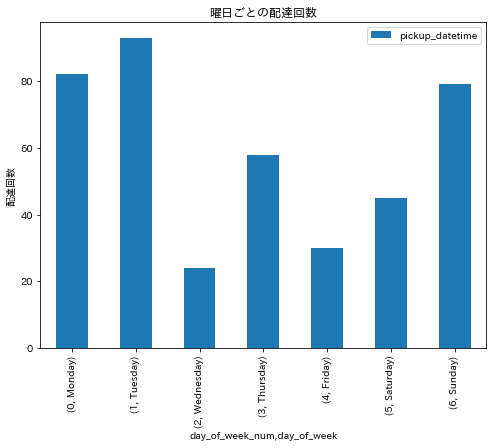

In [22]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

Text(0.5, 1.0, '日にちごとの配達回数')

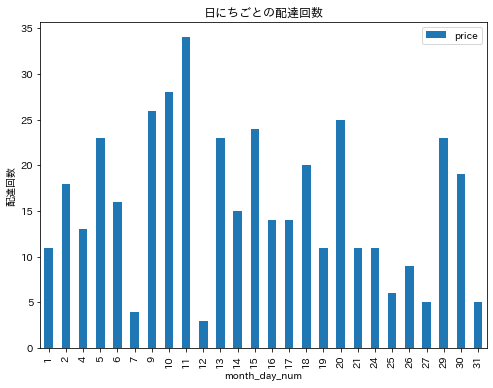

In [23]:
uber_monthdays = df.pivot_table(index=['month_day_num'],
                                  values='price',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('日にちごとの配達回数')

Text(0.5, 1.0, '時間ごとの配達回数')

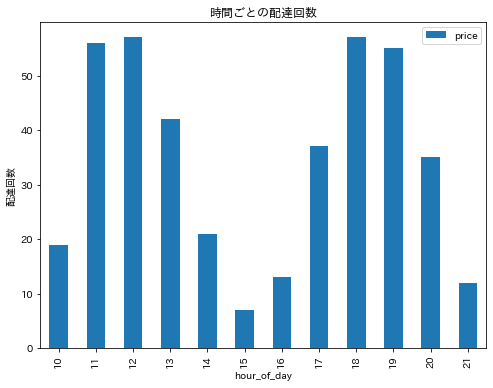

In [24]:
uber_hour = df.pivot_table(index=['hour_of_day'],
                                  values='price',
                                  aggfunc='count')
uber_hour.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('時間ごとの配達回数')

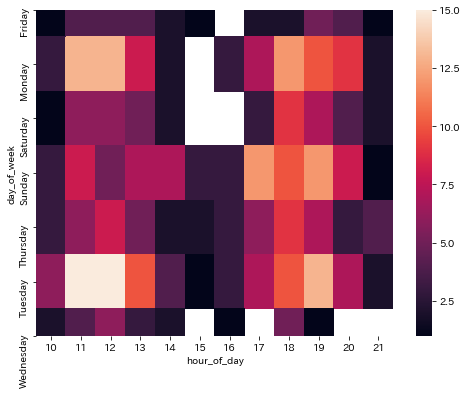

In [25]:
def count_rows(rows):
    return len(rows)

by_cross = df.groupby('day_of_week hour_of_day'.split()).apply(count_rows).unstack()
sns.heatmap(by_cross)

##### 